In [12]:
import pandas as pd
# Create a dataframe for the data in the csv file
recommendations = pd.read_csv('recommendations.csv')
recommendations.head()


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,23221,0
1,304390,4,0,2017-02-17,False,11.5,1283,1
2,1085660,2,0,2019-11-17,True,336.5,105979,2
3,703080,0,0,2022-09-23,True,27.4,108133,3
4,526870,0,0,2021-01-10,True,7.9,10612,4


In [13]:
#Remove column attributes 'helpful', 'funny', 'date', 'review_id'
recommendations = recommendations.drop(['helpful', 'funny', 'date', 'review_id'], axis=1)
recommendations.head()


,app_id,is_recommended,hours,user_id
0,975370,True,36.3,23221
1,304390,False,11.5,1283
2,1085660,True,336.5,105979
3,703080,True,27.4,108133
4,526870,True,7.9,10612


In [14]:
#Remove rows with missing values
recommendations = recommendations.dropna()
recommendations.head()


,app_id,is_recommended,hours,user_id
0,975370,True,36.3,23221
1,304390,False,11.5,1283
2,1085660,True,336.5,105979
3,703080,True,27.4,108133
4,526870,True,7.9,10612


In [16]:
import sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
recommendations['is_recommended'] = label_encoder.fit_transform(recommendations['is_recommended'])
display(recommendations.head())

,app_id,is_recommended,hours,user_id
0,975370,1,36.3,23221
1,304390,0,11.5,1283
2,1085660,1,336.5,105979
3,703080,1,27.4,108133
4,526870,1,7.9,10612


In [17]:
#Find correlation between attributes 'is_recommended' and 'hours' using pearson correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(recommendations['is_recommended'], recommendations['hours'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.053


In [19]:
#import scipy
import scipy.stats

# Computing the point biserial correlation coefficient
corr, pval = scipy.stats.pointbiserialr(recommendations['is_recommended'], recommendations['hours'])
print('Point Biserial correlation: %.3f' % corr, 'p-value: %.3f' % pval)

Point Biserial correlation: 0.053 p-value: 0.000


In [20]:
#Create the game dataframe
games = pd.read_csv('games.csv')
games.head()


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True


In [24]:
metadata = pd.read_json('games_metadata.json', lines=True)

In [25]:
metadatadf = pd.DataFrame(metadata)
metadatadf.head()

,app_id,description,tags
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,,[Action]
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."


In [26]:
games_metadf = pd.merge(games, metadatadf, on='app_id')
games_metadf.head()


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,,[Action]
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."


In [27]:
# These are the columns that we are interested in
relevant_cols = ['app_id', 'title', 'positive_ratio', 'user_reviews', 'tags']
gamesdf = games_metadf[relevant_cols]
# Sort by user reviews to keep the top 100 reviewed games
gamesdf = gamesdf.sort_values(by = 'user_reviews', ascending = False)
gamesdf = gamesdf.head(100)
review_avg = gamesdf['user_reviews'].mean()

Series Size  246
Average Common Genres  8.130081300813009


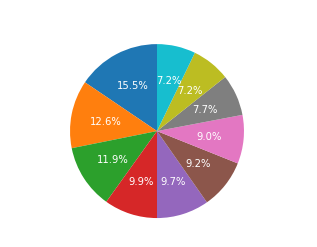

In [34]:
import numpy as np
from matplotlib import pyplot as plt

genres = gamesdf['tags']
count_list = []
for i in genres:
    for j in i:
        count_list.append(j)

sorted_genres = pd.value_counts(np.array(count_list))
sorted_genres = sorted_genres.sort_values(ascending=False)
print("Series Size ", sorted_genres.size)
print("Average Common Genres ", sorted_genres.mean())

# Create a chart to help us see our results
genre_slice = sorted_genres.head(10)
labels = genre_slice.keys()

fig, ax = plt.subplots()
title = 'Most Reviewed Game Tags'
title_text = plt.title(title)
title_text.set_color('white')

#Set different colors for each label font
pchart = plt.pie(genre_slice, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops={'fontsize': 10, 'color': 'white'})

Series Size  110
Average Common Genres  1.8181818181818181


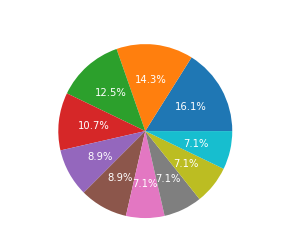

In [38]:
# Pick out the top 10 most positively reviewed games will help give a picture of games that are almost universally loved by players
gamesdf = gamesdf.sort_values('positive_ratio', ascending=False)
positivedf = gamesdf.head(10)
tags = positivedf['tags']
count_list = []
for i in tags:
    for j in i:
        count_list.append(j)

sorted_tags = pd.value_counts(np.array(count_list))
sorted_tags = sorted_tags.sort_values(ascending=False)
print("Series Size ", sorted_tags.size)
print("Average Common Genres ", sorted_tags.mean())  

# Create a chart to help us see our results
tag_slice = sorted_tags.head(10)
labels = tag_slice.keys()

fig, ax = plt.subplots()
title = 'Most Positively Reviewed Game Tags'
title_text = plt.title(title)
title_text.set_color('white')
pchart = ax.pie(tag_slice, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 10, 'color': 'white'})